# Exercise 03

Written By: Aiden Zelakiewicz (asz39@cornell.edu)

Inspired By: [2022 Cornell REU Python Workshop Part 03](https://github.com/CUAstro-REU-Python-Workshop/2022-workshop)

In this exercise, we will go over many useful Python packages for astronomy and some of their features. Three of the big package we will overview are `numpy`, `astropy`, and `scipy`. For `numpy` in particular, I will overview some useful features of the package we did not go over in the prior exercises. We will also splash in some `matplotlib` to visualize many of the concepts we will go over. All of these packages work well together, so you should notice some overlap as we proceed.

## Numpy

In [1]:
import numpy as np

### Creating Arrays

There are many ways to create various arrays in `numpy` that you certainly will find yourself using frequently. Below I am just going to show a few examples of the various ways to create organized and random arrays of numbers.

With randomness within `numpy`, you can set a seed so that others can get the same set of random numbers. You do this by setting `np.random.seed()` to whatever you would like the seed to be.

In [2]:
# Equally spaced points
x_lin = np.linspace(0, 10, 100)

# Logarithmically spaced points
x_log = np.logspace(0, 1, 100)

# Set the seed for reproducibility
np.random.seed(42)

# Random points in range [0, 1)
x_rand = np.random.rand(100)

# Random integers
x_randint = np.random.randint(0, 10, 100)

# Normal distribution about a value (0) with a standard deviation of 1
x_normal = np.random.normal(loc=0, scale=1, size=100) # Explicitly setting loc and scale for clarity

# Zero array
x_zeros = np.zeros(100)

# Ones array
x_ones = np.ones(100)

### Manipulating Arrays

Often you have an array that has varying types of data, some of which 

Let's practice some of these techniques on real data from observations at the United Kingdom Infrared Telescope (UKIRT). In this folder is a single CMD from yours truly which contains the $K$-band and $H-K$ color, stored in `ukirt.csv`.

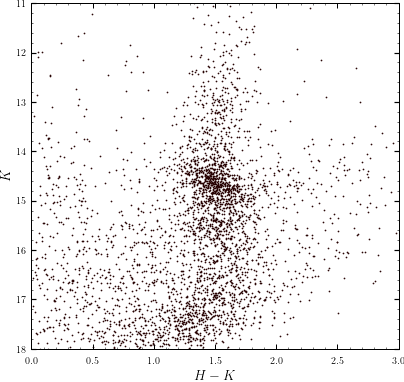

In [3]:
# Read in UKIRT data, has header K, H-K
ukirt = np.loadtxt('ukirt.csv', delimiter=',', skiprows=1)

import matplotlib.pyplot as plt
plt.style.use('az-paper-twocol')

# We will use this more than once, so let's define a function!
# Remember DRY: Don't Repeat Yourself
def plot_cmd(array):
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    ax.scatter(array[:,1], array[:,0], s=.5, c='#260101') # You can also use hex colors
    ax.set_xlabel(r'$H-K$')
    ax.set_ylabel(r'$K$')
    ax.set_xlim(0., 3.)
    ax.set_ylim(18., 11.) # This reverses the y-axis

    plt.show()

plot_cmd(ukirt)

#### Where
This field is used to calculate the extinction (amount of light blocked from observer) in the Milky Way. Let's say we want to isolate stars with $K$-band magnitude between [12,16]. In vanilla Python, one might think to loop (or list comprehension) the entire dataset. Luckily, `numpy` has useful functions like `np.where()` which can do exactly this thing! It will return the indices where a specific condition is met on an array.

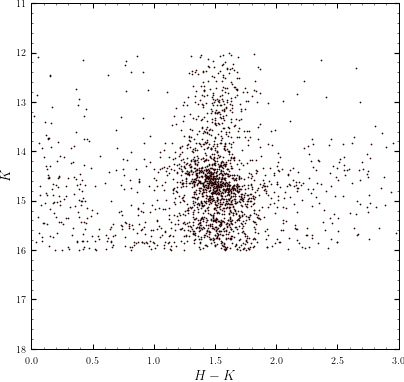

In [4]:
# Let's isolate the stars with K magnitudes between 12 and 16
# We can combine conditions with & (and) and | (or)
inds = np.where((ukirt[:,0] <= 16) & (ukirt[:,0] >= 12))

# Isolate the data
ukirt_sub = ukirt[inds]

plot_cmd(ukirt_sub) # Yay function!

A good logical way to understand what happens is your condition creates an array of `booleans`, which you then pass to `np.where()` to return the index at which those `booleans` are `True`. 

#### Argsort

You may need to sort your data, which `np.argsort()` may be useful. It return the indices for which the data would be sorted.

In [5]:
# Argsort returns the indices that would sort the array

# Sort by K magnitude
inds = np.argsort(ukirt[:,0])
ukirt_sorted = ukirt[inds]

print(ukirt_sorted)

[[ 9.871  1.144]
 [10.042  1.144]
 [10.611  1.362]
 ...
 [18.259  0.777]
 [18.412 -0.409]
 [18.516  0.533]]


#### Percentile

Getting the value at a specific percentile in an `ndarray` is very useful for a number of cases. One I imediately think of is setting colorbar scales for data, where outliers can make your figure unreadable! Let's find the 90\% value of $H-K$ color using `np.percentile()`.

In [6]:
# Get stars above 10% in H-K using np.percentile
np.percentile(ukirt[:,1], 90)

1.8701000000000008

#### <---TO DO--->

Quick wake up activity!
Combine `np.where()` and `np.percentile()` to get all the stars above the 10th percentile in $H-K$ color AS WELL AS all of the stars within the [12,16] range of $K$-band magnitude.
Then plot these stars using the function we made!
This is to show the power of combining various `numpy` functions to quickly achieve a somewhat difficult result!

If this seems like a lot to do, remember you can break it up into tiny chunks!

In [7]:
### YOUR CODE HERE

## Astropy

### Units and Constants

One of the most useful features of `astropy` is its ability to handle units (the module is named `units`). If you assign a variable a unit, you can ask `astropy` to convert it do a different standard or do calculations without having to convert things yourself. Don't tell my professors, but I haven't calculated unit conversions by hand in ages thanks to `astropy`. This module alone made using Python my go-to calculator, especially since they work with `numpy` functions!

Another module, which goes hand-in-hand with `astropy.units` is `astropy.constants`. Astropy has a lot of standard constants set, such as Boltzman's constant or Plank's constant.

There is a slight learning curve with using `astropy.units`, as you need to know how they define all of the units. Most, however, are very intuitive and you can always check the docs if you're confused!

In [8]:
# Usually people load astropy modules in seperately, rather than the entire package
import astropy.units as u
import astropy.constants as c # a common alias for this is 'const', I'm just lazy

# Create a unit of length
length = 26.2 * u.m

print(length)

print(length.to(u.cm))

26.2 m
2620.0 cm


Notice above how we used the `.to()` attribute to change the units. This is incredibly useful when you need to do math and work out units!

In [9]:
# Get the recieved flux from a star
lum = 0.85 * u.Lsun
dist = 10 * u.pc

# F = L / (4 * pi * d^2)
flux = lum / (4 * np.pi * dist**2)
print(f"Flux: {flux.to(u.W / u.m**2):0.2e}")

Flux: 2.72e-10 W / m2


You might be wondering what I did to the string above. That is called "formatting" (denoted by `:`), which just alters the way the value is displayed. In this case, I asked to go to 2 decimal places (the `0.2`) and be put in scientific notation (the `e`).

Let's also use some constants to get the force of gravity between the Earth and Sun!

In [10]:
# Using constant c.G
Fg = c.G * c.M_earth * c.M_sun / c.au**2

print(f"{Fg.to(u.N):0.2e}")

3.54e+22 N


### Reading Files

While the `astropy.io` module contains many useful functions like `readascii()`, the most important tool is the ability to read `fits` files. For the uninformed, `fits` files are a common file format used within astronomy. You can only avoid `fits` for so long before being forced to use them (I tried). We will download a sample fits file from `astropy` and open it using `fits.open()`.

In [11]:
from astropy.io import fits

# Let's read in a sample data file from astropy
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

# Open the file with fits.open()
hdu_list = fits.open(image_file)

# Structure of the file
hdu_list.info()

Filename: /Users/shockblack/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


`fits` files have headers, and data is usually stored in the `Primary` block. You can access different blocks through indexing.

In [12]:
# Get the data
data = hdu_list[0].data

# You can also do it this way if you don't want header information
data = fits.getdata(image_file)

# Access the header, which has metadata
header = hdu_list[0].header

We can access the header keys using `header.keys` and call them similarly to a dictionary.

In [13]:
print(header.keys)

<bound method Header.keys of SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               

In [14]:
# Exposure time in minutes
header['EXPOSURE']

65.0

Yikes thats a lot of information! We can now close the file to free up memory since we have the data saved.

In [15]:
# Close the file
hdu_list.close()

Like we did in the `matplotlib` exercise, let's plot this image using `plt.imshow()`.

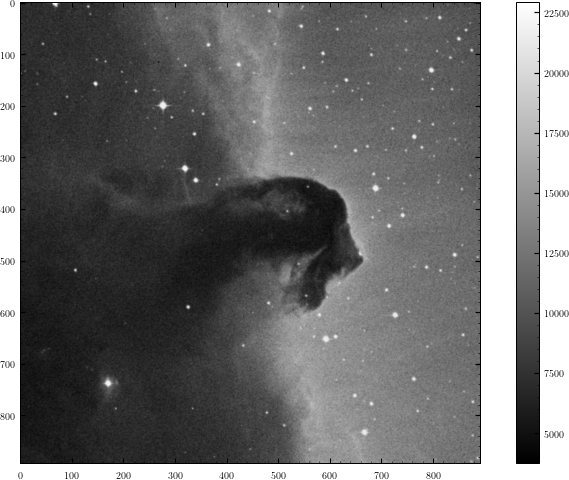

In [16]:
# Plot the image with imshow
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

### Coordinates

Astronomy has various coordinate systems with nontrivial transformations between them. `Astropy` can handle these coordinate systems for us and provide a lot of other cool functionalities like proper axis plotting! Most often you will work through `astropy.coordinates.SkyCoord()` to do coordinate related activites.

Let's extract the Right Ascension (RA) and Declination (Dec) of the horsehead image above and create a `SkyCoord` for it.

In [17]:
from astropy.coordinates import SkyCoord

# Get RA and Dec of Horsehead Nebula
RA = header['PlateRA']; Dec = header['PlateDec'] # These are in degrees

# Create a SkyCoord object
coords = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg, frame='icrs') # ICRS is the default frame for RA and Dec

In typical `astropy` fashion, we can convert these to other units or other reference frames.

In [21]:
# Print the coordinates
print(coords.to_string('hmsdms'))

# Can also just get RA or Dec
print(coords.ra.hms)
print(coords.ra.deg)

# Get the galactic coordinates
gal_coords = coords.galactic
print(gal_coords)

05h42m23.8692s -04d56m47.79276s
hms_tuple(h=5.0, m=42.0, s=23.869200000005293)
85.599455
<SkyCoord (Galactic): (l, b) in deg
    (209.44042923, -17.60192539)>


It is useful to know that `SkyCoords` can take an array of location data, which is substantially faster than creating individual SkyCoordinate objects. You can then access the individual coordinates using indexing.

In [25]:
# Array of coordinates
ra = np.array([10, 20, 30]) * u.deg
dec = np.array([45, 50, 55]) * u.deg

# Create a SkyCoord object
coord_arr = SkyCoord(ra=ra, dec=dec)

print(coord_arr)
print(coord_arr[1])

<SkyCoord (ICRS): (ra, dec) in deg
    [(10., 45.), (20., 50.), (30., 55.)]>
<SkyCoord (ICRS): (ra, dec) in deg
    (20., 50.)>


#### World Coordinate System

Another way of getting coordinates from `fits` files is using the World Coordinate System, or `astropy.WCS`. By giving `astropy` the header of a `fits` file, we can get its location information and plot projections! This is done by setting the `projection` argument of `plt.subplot()` to the `wcs` from `astropy`.

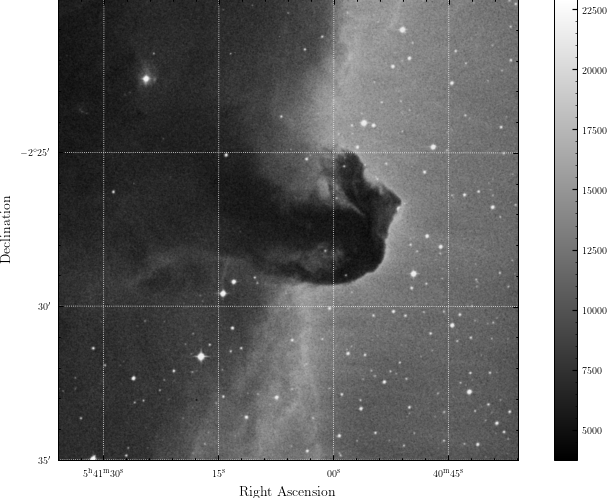

In [30]:
# Create WCS from header
from astropy.wcs import WCS

horsehead_wcs = WCS(header)

# Plot the image with imshow and WCS
plt.subplot(projection=horsehead_wcs)

plt.imshow(data, cmap='gray')
plt.colorbar()

# Add gridlines
plt.grid(color='white', ls='dotted')

plt.xlabel('Right Ascension')
plt.ylabel('Declination')

plt.show()

## Scipy